# TP7 ALTEGRAD - LACOMBE Yoach

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd 'My Drive'/

Mounted at /gdrive
/gdrive
/gdrive/My Drive


In [ ]:
PATH_DIGINETICA_TEST = './dataset_ALTEGRAD/diginetica_test.p'
PATH_DIGINETICA_TRAIN = './dataset_ALTEGRAD/diginetica_train.p'
PATH_SOCRATES = './dataset_ALTEGRAD/Socrates_network.xlsx'

## DeepSets

In [ ]:
"""
Learning on Sets - ALTEGRAD - Jan 2022
"""

import numpy as np


def create_train_dataset():
    n_train = 100000
    max_train_card = 10
    X_train = np.zeros((n_train, max_train_card))

    ############## Task 1
    
    ##################
    # your code here #
    ##################
    for j in range(1,11):
      X_train[(j-1)*10000:(j)*10000, 0:j] = np.random.randint(1,11, (10000,j))

    np.random.shuffle(X_train)
    y_train = np.sum(X_train, axis = 1)

    return X_train, y_train


def create_test_dataset():
    
    ############## Task 2
    
    ##################
    # your code here #
    ##################
    n_train = 200000
    max_train_card = 100
    X_test = []

    for j, k in enumerate(range(5,105,5)):
      X_test.append(np.random.randint(1,11, (10000,k)))

    y_test = [np.sum(x, axis = 1) for x in X_test]

    return X_test, y_test

In [ ]:
"""
Learning on Sets - ALTEGRAD - Jan 2022
"""

import torch
import torch.nn as nn

class DeepSets(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim):
        super(DeepSets, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)
        self.tanh = nn.Tanh()

    def forward(self, x):
        
        ############## Task 3
    
        ##################
        # your code here #
        ##################
        x = self.embedding(x)
        x = self.tanh(self.fc1(x))
        x = x.sum(axis = 1)
        x = self.fc2(x)

        return x.squeeze()


class LSTM(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim):
        super(LSTM, self).__init__()

        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        
        ############## Task 4
    
        ##################
        # your code here #
        ##################
        x = self.embedding(x)
        x, _  = self.lstm(x)
        x = self.fc(x[:,-1,:])
        return x.squeeze()

In [ ]:
"""
Learning on Sets - ALTEGRAD - Jan 2022
"""

import time
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn



# Initializes device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Hyperparameters
epochs = 20
batch_size = 64
embedding_dim = 128
hidden_dim = 64
learning_rate = 0.001

# Generates training data
X_train, y_train = create_train_dataset()
n_train = 100000
n_digits = 11

# Initializes DeepSets model and optimizer
deepsets = DeepSets(n_digits, embedding_dim, hidden_dim).to(device)
optimizer = optim.Adam(deepsets.parameters(), lr=learning_rate)
loss_function = nn.L1Loss()

# Trains the DeepSets model
for epoch in range(epochs):
    t = time.time()
    deepsets.train()
     
    train_loss = 0
    count = 0
    idx = np.random.permutation(n_train)
    for i in range(0, n_train, batch_size):
        
        ############## Task 5
    
        ##################
        # your code here #
        ##################
        x_batch = X_train[i:batch_size + i,:]
        y_batch = y_train[i:batch_size + i]

        x_batch = torch.Tensor(x_batch).type(torch.long)
        y_batch = torch.Tensor(y_batch).type(torch.long)
        
        optimizer.zero_grad()
        output = deepsets(x_batch)
        loss = loss_function(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * output.size(0)
        count += output.size(0)
    
    print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(train_loss / count),
          'time: {:.4f}s'.format(time.time() - t))

# Stores DeepSets model into disk
torch.save({
    'state_dict': deepsets.state_dict(),
    'optimizer' : optimizer.state_dict(),
}, 'model_deepsets.pth.tar')

print("Finished training for DeepSets model")
print()

# Initializes LSTM model and optimizer
lstm = LSTM(n_digits, embedding_dim, hidden_dim).to(device)
optimizer = optim.Adam(lstm.parameters(), lr=learning_rate)
loss_function = nn.L1Loss()

# Trains the LSTM model
for epoch in range(epochs):
    t = time.time()
    lstm.train()
     
    train_loss = 0
    count = 0
    idx = np.random.permutation(n_train)
    for i in range(0, n_train, batch_size):
    
        ############## Task 5
        
        ##################
        # your code here #
        ##################
        x_batch = X_train[i:batch_size + i,:]
        y_batch = y_train[i:batch_size + i]

        x_batch = torch.Tensor(x_batch).type(torch.long)
        y_batch = torch.Tensor(y_batch).type(torch.long)
        
        optimizer.zero_grad()
        output = lstm(x_batch)
        loss = loss_function(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * output.size(0)
        count += output.size(0)
    
    print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(train_loss / count),
          'time: {:.4f}s'.format(time.time() - t))

# Stores LSTM model into disk
torch.save({
    'state_dict': lstm.state_dict(),
    'optimizer' : optimizer.state_dict(),
}, 'model_lstm.pth.tar')

print("Finished training for LSTM model")

Epoch: 0001 loss_train: 0.9113 time: 3.3390s
Epoch: 0002 loss_train: 0.0748 time: 3.1972s
Epoch: 0003 loss_train: 0.0560 time: 3.3496s
Epoch: 0004 loss_train: 0.0513 time: 3.3270s
Epoch: 0005 loss_train: 0.0460 time: 3.5921s
Epoch: 0006 loss_train: 0.0408 time: 3.4620s
Epoch: 0007 loss_train: 0.0372 time: 3.5167s
Epoch: 0008 loss_train: 0.0369 time: 3.3907s
Epoch: 0009 loss_train: 0.0326 time: 3.3043s
Epoch: 0010 loss_train: 0.0326 time: 3.2107s
Epoch: 0011 loss_train: 0.0307 time: 3.0868s
Epoch: 0012 loss_train: 0.0310 time: 3.3228s
Epoch: 0013 loss_train: 0.0293 time: 3.1716s
Epoch: 0014 loss_train: 0.0279 time: 3.5067s
Epoch: 0015 loss_train: 0.0280 time: 5.7453s
Epoch: 0016 loss_train: 0.0264 time: 4.3298s
Epoch: 0017 loss_train: 0.0257 time: 3.3516s
Epoch: 0018 loss_train: 0.0270 time: 3.2751s
Epoch: 0019 loss_train: 0.0270 time: 3.2437s
Epoch: 0020 loss_train: 0.0247 time: 3.1513s
Finished training for DeepSets model

Epoch: 0001 loss_train: 10.2522 time: 15.1019s
Epoch: 0002 los

In [ ]:
"""
Learning on Sets - ALTEGRAD - Jan 2022
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_absolute_error
import torch


# Initializes device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Hyperparameters
batch_size = 64
embedding_dim = 128
hidden_dim = 64

# Generates test data
X_test, y_test = create_test_dataset()
cards = [X_test[i].shape[1] for i in range(len(X_test))]
n_samples_per_card = X_test[0].shape[0]
n_digits = 11

# Retrieves DeepSets model
deepsets = DeepSets(n_digits, embedding_dim, hidden_dim).to(device)
print("Loading DeepSets checkpoint!")
checkpoint = torch.load('model_deepsets.pth.tar')
deepsets.load_state_dict(checkpoint['state_dict'])
deepsets.eval()

# Retrieves LSTM model
lstm = LSTM(n_digits, embedding_dim, hidden_dim).to(device)
print("Loading LSTM checkpoint!")
checkpoint = torch.load('model_lstm.pth.tar')
lstm.load_state_dict(checkpoint['state_dict'])
lstm.eval()

# Dict to store the results
results = {'deepsets': {'acc':[], 'mae':[]}, 'lstm': {'acc':[], 'mae':[]}}

for i in range(len(cards)):
    y_pred_deepsets = list()
    y_pred_lstm = list()
    for j in range(0, n_samples_per_card, batch_size):
        
        ############## Task 6
    
        ##################
        # your code here #
        ##################
        x_batch = X_test[i][j:batch_size + j,:]
        x_batch = torch.Tensor(x_batch).type(torch.long)

        y_pred_deepsets.append(deepsets(x_batch))
        y_pred_lstm.append(lstm(x_batch))
        
    y_pred_deepsets = torch.cat(y_pred_deepsets)
    y_pred_deepsets = y_pred_deepsets.detach().cpu().numpy()
    
    acc_deepsets = accuracy_score(y_test[i], np.round(y_pred_deepsets))
    mae_deepsets = mean_absolute_error(y_test[i], y_pred_deepsets)
    results['deepsets']['acc'].append(acc_deepsets)
    results['deepsets']['mae'].append(mae_deepsets)
    
    y_pred_lstm = torch.cat(y_pred_lstm)
    y_pred_lstm = y_pred_lstm.detach().cpu().numpy()
    
    acc_lstm = accuracy_score(y_test[i], np.round(y_pred_lstm))
    mae_lstm = mean_absolute_error(y_test[i], y_pred_lstm)
    results['lstm']['acc'].append(acc_lstm)
    results['lstm']['mae'].append(mae_lstm)


Loading DeepSets checkpoint!
Loading LSTM checkpoint!


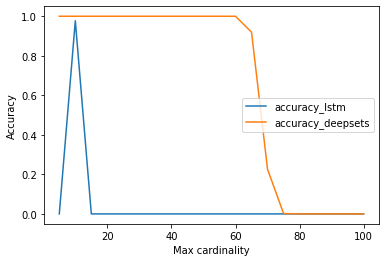

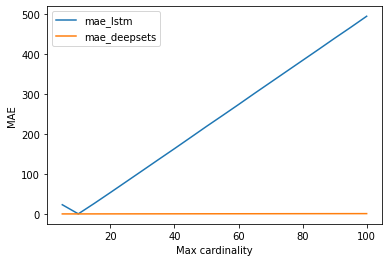

In [ ]:


############## Task 7
    
##################
# your code here #
##################

plt.plot(cards,results['lstm']['acc'], label = 'accuracy_lstm')
plt.plot(cards,results['deepsets']['acc'], label = 'accuracy_deepsets')
plt.xlabel('Max cardinality')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(cards,results['lstm']['mae'], label = 'mae_lstm')
plt.plot(cards,results['deepsets']['mae'], label = 'mae_deepsets')
plt.xlabel('Max cardinality')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Graph-Based Recommendations

In [ ]:
"""
Graph-based Recommentations - ALTEGRAD - Jan 2022
"""

import pickle
import urllib.request
import numpy as np
from scipy.sparse import lil_matrix, block_diag, diags
from math import ceil

import torch


def load_dataset():
    with open(PATH_DIGINETICA_TRAIN, 'rb') as f:
        data_train = pickle.load(f)
    sessions_train = data_train[0]
    y_train = np.array(data_train[1])

    with open(PATH_DIGINETICA_TEST, 'rb') as f:
        data_test = pickle.load(f)
    sessions_test = data_test[0]
    y_test = np.array(data_test[1])

    ############## Task 8
    
    ##################
    # your code here #
    ##################
    print('number of training sessions', len(sessions_train))
    print('number of testing sessions', len(sessions_test))
    my_set = set()
    for l in sessions_train:
      my_set.update(l)
    print('number of unique items in the trainset', len(my_set))
    print('max id', max(my_set), "min", min(my_set))
    print('len of the longest session', max([len(l) for l in sessions_test]))
    max_item_id = max(max(my_set), max(y_train))

    return sessions_train, sessions_test, y_train, y_test, max_item_id


def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(np.vstack((sparse_mx.row, sparse_mx.col))).long()
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)


def normalize(mx):
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx


def generate_batches(sessions, y, batch_size, device, shuffle=False):
    N = len(sessions)
    if shuffle:
        index = np.random.permutation(N)
    else:
        index = np.array(range(N), dtype=np.int32)

    n_batches = ceil(N/batch_size)
    
    adj_lst = list()
    items_lst = list()
    last_item_lst = list()
    idx_lst = list()
    targets_lst = list()
    
    for i in range(0, N, batch_size):
        n_nodes = 0
        for j in range(i, min(i+batch_size, N)):
            n_nodes += np.unique(sessions[index[j]]).size
            
        adj = list()
        items = np.zeros(n_nodes, dtype=np.int32)
        last_item = np.zeros(min(i+batch_size, N)-i, dtype=np.int32)
        idx = np.zeros(n_nodes, dtype=np.int32)
        targets = np.zeros(min(i+batch_size, N)-i, dtype=np.int32)
        
        node_count = 0
        for j in range(i, min(i+batch_size, N)):
            nodes = np.unique(sessions[index[j]])
            node_to_idx = {nodes[i]:i for i in range(nodes.size)}
            A = lil_matrix((nodes.size, nodes.size))
            for k in range(nodes.size):
                A[k,k] = 1
            for k in range(len(sessions[index[j]])-1):
                u = node_to_idx[sessions[index[j]][k]]
                v = node_to_idx[sessions[index[j]][k+1]]
                A[v,u] += 1
                A[u,v] += 1
            
            adj.append(normalize(A))
            items[node_count:node_count+nodes.size] = nodes
            last_item[j-i] = node_count+node_to_idx[sessions[index[j]][-1]]
            idx[node_count:node_count+nodes.size] = j-i
            targets[j-i] = y[index[j]]
            
            node_count += nodes.size
        
        adj = block_diag(adj)
        
        adj_lst.append(sparse_mx_to_torch_sparse_tensor(adj).to(device))
        items_lst.append(torch.LongTensor(items).to(device))
        last_item_lst.append(torch.LongTensor(last_item).to(device))
        idx_lst.append(torch.LongTensor(idx).to(device))
        targets_lst.append(torch.LongTensor(targets).to(device))
   
    return adj_lst, items_lst, last_item_lst, idx_lst, targets_lst

In [ ]:
"""
Graph-based Recommendations - ALTEGRAD - Jan 2022
"""

import math

import torch
import torch.nn as nn

class MessagePassing(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MessagePassing, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, adj, x):
        
        ############## Task 9
    
        ##################
        # your code here #
        ##################
        output = self.fc(x)
        output = torch.mm(adj,output)
        
        return output


class SR_GNN(nn.Module):
    def __init__(self, n_items, hidden_dim, dropout, device):
        super(SR_GNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.device = device
        self.embedding = nn.Embedding(n_items, hidden_dim)
        self.mp1 = MessagePassing(hidden_dim, hidden_dim)
        self.mp2 = MessagePassing(hidden_dim, hidden_dim)
        self.fc1 = nn.Linear(hidden_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, 1, bias=False)
        self.fc4 = nn.Linear(hidden_dim*2, hidden_dim)
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1.0 / math.sqrt(self.hidden_dim)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def forward(self, adj, items, last_item, idx):
        
        ############## Task 10
    
        ##################
        # your code here #
        ##################
        
        e = self.embedding(items)
        h = self.relu(self.mp1(adj,e))
        h = self.dropout(h)
        z = self.mp2(adj,h)
        z = self.dropout(z)
        sl = z[last_item, :]


        
        q1 = self.fc1(sl)
        q1 = torch.index_select(q1, 0, idx)
        q2 = self.fc2(z)
        alpha = self.fc3(torch.sigmoid(q1 + q2))
        z = alpha*z
        idx = idx.unsqueeze(1).repeat(1, z.size(1))
        out = torch.zeros(last_item.size(0), z.size(1)).to(self.device)
        sg = out.scatter_add_(0, idx, z)
        sg = self.dropout(sg)

        
        ##################
        # your code here #
        ##################

        s = torch.cat((sg, sl), dim = 1)
        s = self.fc4(s)


        #out = torch.mm(s, e)

        E = self.embedding.weight[1:, :]
        out = torch.mm(s,E.t())
        #concatenate sg and sl
        #pass through fc4
        #inner product of each embedding with the output of fc4
        #return softmax 
        
        return out

In [ ]:
"""
Graph-based Recommendations - ALTEGRAD - Jan 2022
"""

import time
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim


# Initializes device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Loads training and test data
sessions_train, sessions_test, y_train, y_test, max_item_id = load_dataset()

# Generates batches
adj_train, items_train, last_item_train, idx_train, targets_train = generate_batches(sessions_train, y_train, batch_size=256, device=device)
adj_test, items_test, last_item_test, idx_test, targets_test = generate_batches(sessions_test, y_test, batch_size=256, device=device)

# Hyperparameters
epochs = 30
hidden_dim = 64
dropout = 0.0
learning_rate = 0.001


number of training sessions 719470
number of testing sessions 60858
number of unique items in the trainset 42973
max id 43096 min 1
len of the longest session 40


In [ ]:
model = SR_GNN(max_item_id+2, hidden_dim, dropout, device).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
loss_function = nn.CrossEntropyLoss()

# Trains and evaluates the SR-GNN model
start = time.time()
best_results = {'hit': {'val':0, 'epoch': 0}, 'mrr': {'val':0, 'epoch': 0}}
for epoch in range(epochs):
    t = time.time()
    model.train()
    train_loss = 0.0
    count = 0
    n_train_batches = len(adj_train)
    for i in range(n_train_batches):
        optimizer.zero_grad()
        scores = model(adj_train[i], items_train[i], last_item_train[i], idx_train[i])
        loss = loss_function(scores, targets_train[i]-1)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * scores.size(0)
        count += scores.size(0)
            
    print('Epoch: {:02d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(train_loss / count),
          'time: {:.4f}s'.format(time.time() - t))
    
    model.eval()
    hit, mrr = [], []
    n_test_batches = len(adj_test)
    for i in range(n_test_batches):
        scores = model(adj_test[i], items_test[i], last_item_test[i], idx_test[i])
        sub_scores = scores.topk(20)[1]
        sub_scores = sub_scores.detach().cpu().numpy()
        for score, target in zip(sub_scores, targets_test[i]):
            target = target.cpu().numpy()
            hit.append(np.isin(target-1, score))
            if len(np.where(score == target-1)[0]) == 0:
                mrr.append(0)
            else:
                mrr.append(1 / (np.where(score == target - 1)[0][0] + 1))
    
    hit = np.mean(hit)*100
    if hit >= best_results['hit']['val']:
        best_results['hit']['val'] = hit
        best_results['hit']['epoch'] = epoch
   
    mrr = np.mean(mrr)*100
    if mrr >= best_results['mrr']['val']:
        best_results['mrr']['val'] = mrr
        best_results['mrr']['epoch'] = epoch
        
    print('Best Results on Test Set:')
    print('Recall@20: {:.4f}'.format(best_results['hit']['val']),
          'MMR@20: {:.4f}'.format(best_results['mrr']['val']))
    print('-------------------------------------------------------')
    print()

Epoch: 01 loss_train: 8.5369 time: 570.7989s
Best Results on Test Set:
Recall@20: 27.5313 MMR@20: 7.5957
-------------------------------------------------------

Epoch: 02 loss_train: 6.5375 time: 612.3839s
Best Results on Test Set:
Recall@20: 38.6901 MMR@20: 11.3190
-------------------------------------------------------

Epoch: 03 loss_train: 5.7755 time: 584.5933s
Best Results on Test Set:
Recall@20: 43.8283 MMR@20: 13.1827
-------------------------------------------------------

Epoch: 04 loss_train: 5.4055 time: 563.8418s
Best Results on Test Set:
Recall@20: 45.5585 MMR@20: 13.9046
-------------------------------------------------------

Epoch: 05 loss_train: 5.1766 time: 552.7189s
Best Results on Test Set:
Recall@20: 45.8033 MMR@20: 14.0490
-------------------------------------------------------



KeyboardInterrupt: ignored

**note:** Training took too much time,  I haven't finished it.